In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
import os

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"olehandrus","key":"4cbbff5bf2337f7b1a69f8bc8a0f07ae"}'}

In [0]:
image_size = 299
batch_size = 32

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:39<00:00, 67.7MB/s]
100% 2.29G/2.29G [00:39<00:00, 61.8MB/s]


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!ls

chest-xray-pneumonia.zip  kaggle.json  sample_data


In [0]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [0]:
%tensorflow_version 1.x
import os
import tqdm
import matplotlib.pyplot as plt
from tensorflow.python.keras import preprocessing, layers, models, optimizers
import numpy as np

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
train_dir = 'chest_xray/train'
test_dir = 'chest_xray/test'
input_shape = (image_size,image_size,3)


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(image_size, image_size,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 700928)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 700928)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               89718912  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 89,719,937
Trainable params: 89,719,937
Non-trainable params: 0
__________________________________________

In [0]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest')

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [0]:
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=40,
    epochs= 5, # use more epochs if you are not limited by 1 hour limit
    validation_data=test_generator,
    validation_steps=5)

Epoch 1/5
40/40 [==============================] - 46s 1s/step - loss: 2.7347 - acc: 0.6617 - val_loss: 1.2607 - val_acc: 0.4000
Epoch 2/5
40/40 [==============================] - 44s 1s/step - loss: 0.9879 - acc: 0.6516 - val_loss: 0.7544 - val_acc: 0.6250
Epoch 3/5
40/40 [==============================] - 43s 1s/step - loss: 0.7337 - acc: 0.7156 - val_loss: 0.4323 - val_acc: 0.7937
Epoch 4/5
40/40 [==============================] - 42s 1s/step - loss: 0.6443 - acc: 0.7234 - val_loss: 0.4753 - val_acc: 0.7625
Epoch 5/5
40/40 [==============================] - 41s 1s/step - loss: 0.4402 - acc: 0.8156 - val_loss: 0.7609 - val_acc: 0.6250


In [0]:
model

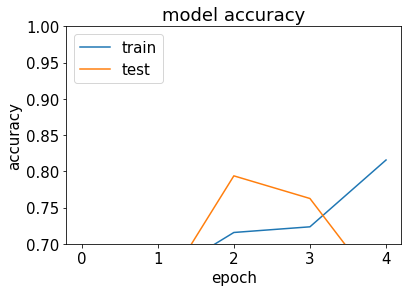

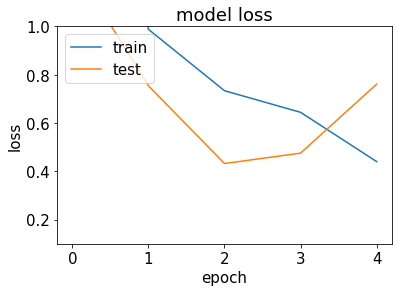

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.7, 1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# График оценки loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0.1, 1)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
import numpy as np

In [0]:
val_dir = 'chest_xray/val'

In [0]:
val_datagen = preprocessing.image.ImageDataGenerator(rescale=1. / 255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


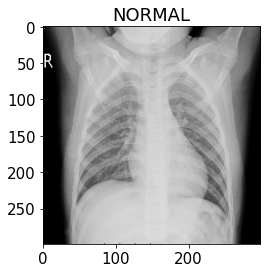

[[0.9711764]]


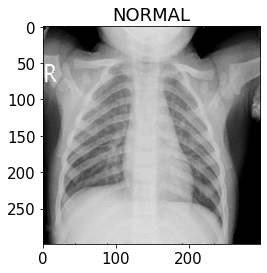

[[0.9542952]]


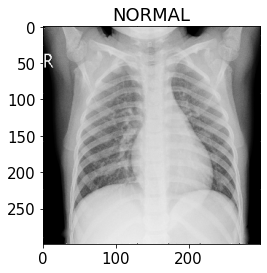

[[0.97054]]


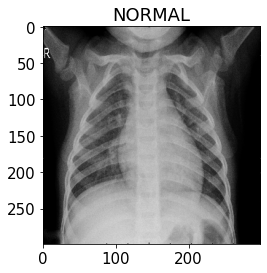

[[0.87589735]]


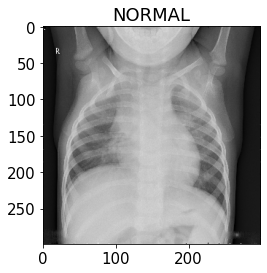

[[0.97804046]]


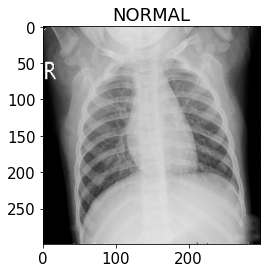

[[0.95947385]]


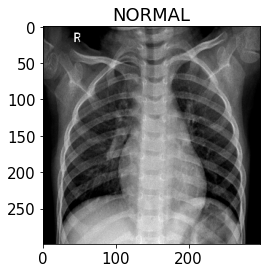

[[0.3513033]]


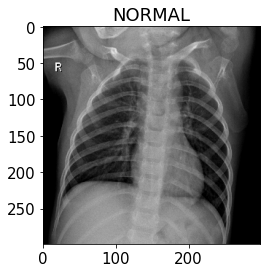

[[0.3356108]]


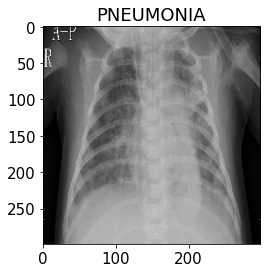

[[0.97301304]]


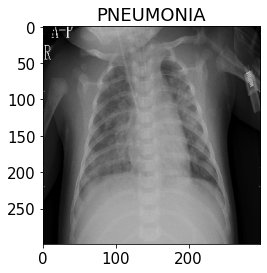

[[0.9824985]]


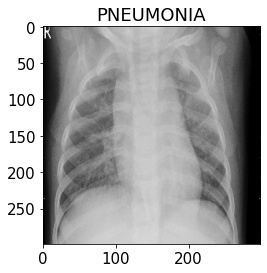

[[0.97747314]]


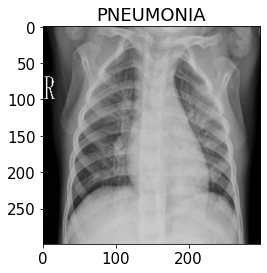

[[0.96925]]


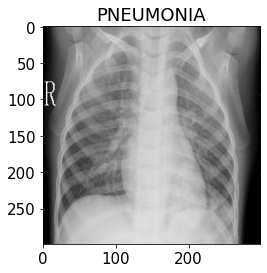

[[0.96959007]]


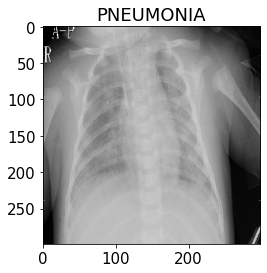

[[0.99697757]]


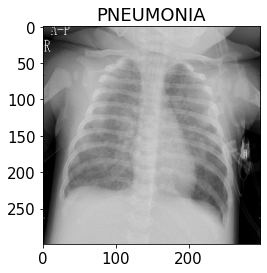

[[0.9850412]]


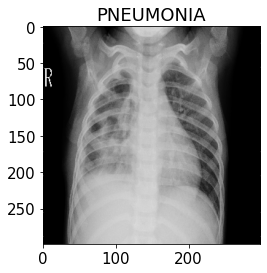

[[0.9665083]]


In [0]:
true_res = list()
predicted_res = list()
for i in val_generator.filenames:
    path = i.split("/")
    if (path[0] == "NORMAL"):
      true_res.append(0)
    else:
      true_res.append(1)
    path_im = "chest_xray/val/" + i
    img = preprocessing.image.load_img(path_im, target_size=(image_size, image_size))
    plt.imshow(img)
    plt.title(path[0])
    plt.show()  
    x = preprocessing.image.img_to_array(img)
    x /=255
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x)
    print(prediction)
    if (prediction <=0.5):
      predicted_res.append(0)
    else:
      predicted_res.append(1)

In [0]:
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2 6]
 [0 8]]


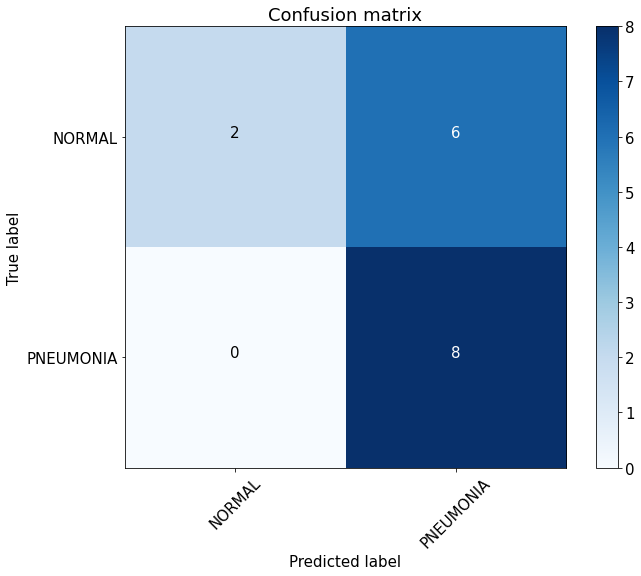

In [0]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(true_res,predicted_res)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=["NORMAL", "PNEUMONIA"],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()